In [41]:
import nltk
import pandas as pd
import re
import string
from nltk.stem import WordNetLemmatizer 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.stem import WordNetLemmatizer

%matplotlib inline

In [42]:
dataset = pd.read_csv("drive/MyDrive/Data/Restaurant_Reviews.tsv", delimiter = '\t', quoting =3)

In [43]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [44]:
print("The Number of Positive = ", (dataset["Liked"]==1).sum())
print("The Number of Negative = ", (dataset["Liked"]==0).sum())

The Number of Positive =  500
The Number of Negative =  500


In [45]:
pos_rev = " "
neg_rev = " "

In [46]:
len(dataset)

1000

In [47]:
for i in range(0, 1000):
  if dataset["Liked"][i] == 1:
    pos_rev = pos_rev+" "+dataset["Review"][i]
  if dataset["Liked"][i] == 0:
    neg_rev = neg_rev+" "+dataset["Review"][i]

In [51]:
print("Length of Positive Reviews", len(pos_rev))
print("")
print("Part of Positive Reviews")
print(pos_rev[1000:2000])

Length of Positive Reviews 28441

Part of Positive Reviews
 service. The only thing I did like was the prime rib and dessert section. The burger is good beef, cooked just right. If you want a sandwich just go to any Firehouse!!!!! My side Greek salad with the Greek dressing was so tasty, and the pita and hummus was very refreshing. We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside. He came running after us when he realized my husband had left his sunglasses on the table. Their chow mein is so good! The portion was huge! Loved it...friendly servers, great food, wonderful and imaginative menu. The salad had just the right amount of sauce to not over power the scallop, which was perfectly cooked. This place receives stars for their APPETIZERS!!! The cocktails are all handmade and delicious. We'd definitely go back here again. We are so glad we found this place. Great food and service, huge portions and they give a military discount. Always a

In [52]:
print("Length of Negative Reviews", len(neg_rev))
print("")
print("Part of Negative Reviews")
print(neg_rev[1000:2000])

Length of Negative Reviews 30876

Part of Negative Reviews
ce, the waiter made me feel like I was stupid every time he came to the table. Service sucks. There is not a deal good enough that would drag me into that establishment again. Hard to judge whether these sides were good because we were grossed out by the melted styrofoam and didn't want to eat it for fear of getting sick. Frozen pucks of disgust, with some of the worst people behind the register. It's too bad the food is so damn generic. They have horrible attitudes towards customers, and talk down to each one when customers don't enjoy their food. The Heart Attack Grill in downtown Vegas is an absolutely flat-lined excuse for a restaurant. Not much seafood and like 5 strings of pasta at the bottom. The ripped banana was not only ripped, but petrified and tasteless. At least think to refill my water before I struggle to wave you over for 10 minutes. We got the food and apparently they have never heard of salt and the batter on 

#### Positive Reviews

In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
text_nopunct_pos = ''
text_nopunct_pos = "".join([char for char in pos_rev if char not in string.punctuation])

In [55]:
text_nopunct_pos

'  Wow Loved this place Stopped by during the late May bank holiday off Rick Steve recommendation and loved it The selection on the menu was great and so were the prices The fries were great too A great touch Service was very prompt I tried the Cape Cod ravoli chicken with cranberrymmmm Highly recommended The food amazing Service is also cute I could care less The interior is just beautiful So they performed Thats rightthe red velvet cakeohhh this stuff is so good This hole in the wall has great Mexican street tacos and friendly staff Also there are combos like a burger fries and beer for 23 which is a decent deal I found this place by accident and I could not be happier Overall I like this place a lot The only redeeming quality of the restaurant was that it was very inexpensive Ample portions and good prices My first visit to Hiro was a delight The shrimp tender and moist On a positive note our server was very attentive and provided great service The only thing I did like was the prim

In [56]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [57]:
tokenizer

RegexpTokenizer(pattern='\\w+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)

In [58]:
pos_tokens = tokenizer.tokenize(text_nopunct_pos)

In [59]:
len(pos_tokens), pos_tokens

(5118,
 ['Wow',
  'Loved',
  'this',
  'place',
  'Stopped',
  'by',
  'during',
  'the',
  'late',
  'May',
  'bank',
  'holiday',
  'off',
  'Rick',
  'Steve',
  'recommendation',
  'and',
  'loved',
  'it',
  'The',
  'selection',
  'on',
  'the',
  'menu',
  'was',
  'great',
  'and',
  'so',
  'were',
  'the',
  'prices',
  'The',
  'fries',
  'were',
  'great',
  'too',
  'A',
  'great',
  'touch',
  'Service',
  'was',
  'very',
  'prompt',
  'I',
  'tried',
  'the',
  'Cape',
  'Cod',
  'ravoli',
  'chicken',
  'with',
  'cranberrymmmm',
  'Highly',
  'recommended',
  'The',
  'food',
  'amazing',
  'Service',
  'is',
  'also',
  'cute',
  'I',
  'could',
  'care',
  'less',
  'The',
  'interior',
  'is',
  'just',
  'beautiful',
  'So',
  'they',
  'performed',
  'Thats',
  'rightthe',
  'red',
  'velvet',
  'cakeohhh',
  'this',
  'stuff',
  'is',
  'so',
  'good',
  'This',
  'hole',
  'in',
  'the',
  'wall',
  'has',
  'great',
  'Mexican',
  'street',
  'tacos',
  'and',


In [60]:
words_pos = []
for word in pos_tokens:
  words_pos.append(word.lower())

In [61]:
stopwords = nltk.corpus.stopwords.words('english')

In [64]:
final_words_pos = []

for word in words_pos:
  if word not in stopwords:
    final_words_pos.append(word)

In [65]:
wn = WordNetLemmatizer()

In [67]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [68]:
lem_words_pos = []

for word in final_words_pos:
  word = wn.lemmatize(word)
  lem_words_pos.append(word)

In [69]:
lem_words_pos[:10]

['wow',
 'loved',
 'place',
 'stopped',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve']

In [89]:
freq_dis_pos = nltk.FreqDist(lem_words_pos)
freq_dis_pos

FreqDist({'wow': 3,
          'loved': 10,
          'place': 60,
          'stopped': 2,
          'late': 1,
          'may': 3,
          'bank': 1,
          'holiday': 1,
          'rick': 1,
          'steve': 1,
          'recommendation': 3,
          'selection': 10,
          'menu': 13,
          'great': 70,
          'price': 13,
          'fry': 6,
          'touch': 2,
          'service': 46,
          'prompt': 1,
          'tried': 5,
          'cape': 1,
          'cod': 1,
          'ravoli': 1,
          'chicken': 10,
          'cranberrymmmm': 1,
          'highly': 3,
          'recommended': 2,
          'food': 60,
          'amazing': 21,
          'also': 18,
          'cute': 2,
          'could': 8,
          'care': 2,
          'le': 1,
          'interior': 1,
          'beautiful': 3,
          'performed': 1,
          'thats': 1,
          'rightthe': 1,
          'red': 1,
          'velvet': 1,
          'cakeohhh': 1,
          'stuff': 2,
       

In [84]:
freq_dis_pos_top10 = freq_dis_pos.most_common(10)

In [86]:
freq_dis_pos_top10

[('good', 73),
 ('great', 70),
 ('place', 60),
 ('food', 60),
 ('service', 46),
 ('time', 26),
 ('friendly', 23),
 ('delicious', 23),
 ('back', 23),
 ('nice', 22)]

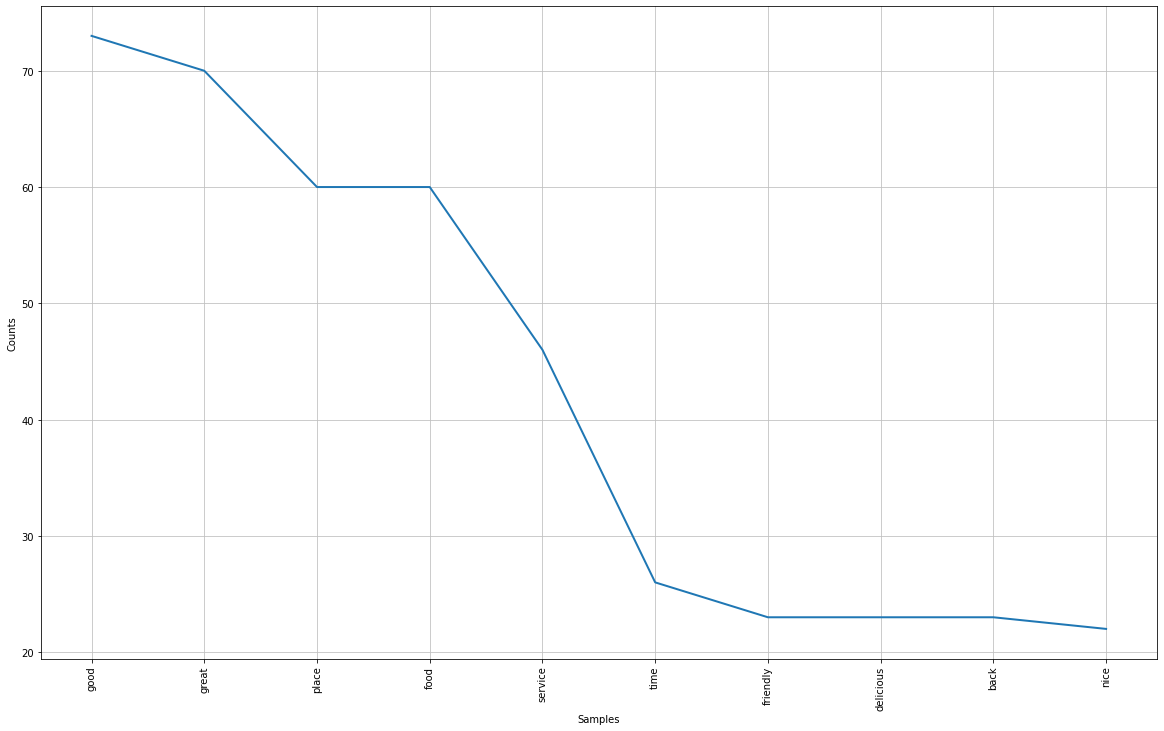

In [91]:
plt.subplots(figsize=(20,12))
freq_dis_pos.plot(10)

1. We can see the word frequecy here.
2. Positive words find a higher frequency her.

In [92]:
res_pso = ' '.join([i for i in lem_words_pos if not i.isdigit()])

In [93]:
res_pso

'wow loved place stopped late may bank holiday rick steve recommendation loved selection menu great price fry great great touch service prompt tried cape cod ravoli chicken cranberrymmmm highly recommended food amazing service also cute could care le interior beautiful performed thats rightthe red velvet cakeohhh stuff good hole wall great mexican street taco friendly staff also combo like burger fry beer decent deal found place accident could happier overall like place lot redeeming quality restaurant inexpensive ample portion good price first visit hiro delight shrimp tender moist positive note server attentive provided great service thing like prime rib dessert section burger good beef cooked right want sandwich go firehouse side greek salad greek dressing tasty pita hummus refreshing ordered duck rare pink tender inside nice char outside came running u realized husband left sunglass table chow mein good portion huge loved itfriendly server great food wonderful imaginative menu sala

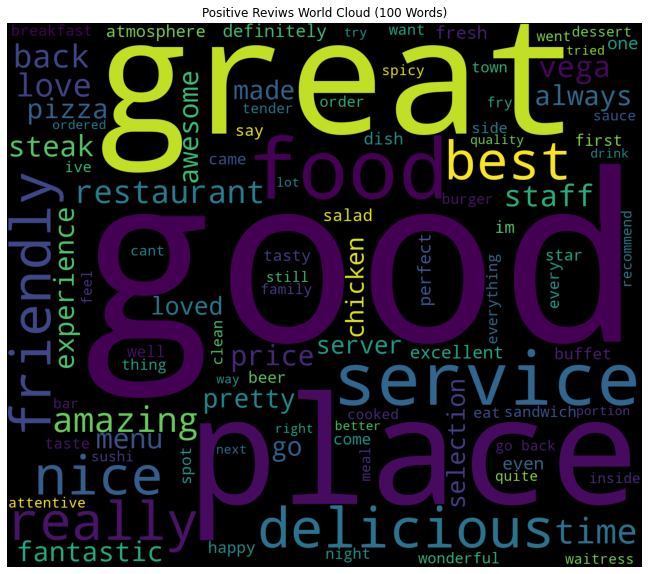

In [98]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
    background_color='black',
    max_words = 100,
    width = 1400,
    height = 1200
).generate(res_pso)

plt.imshow(wordcloud)
plt.title('Positive Reviws World Cloud (100 Words)')
plt.axis('off')
plt.show()

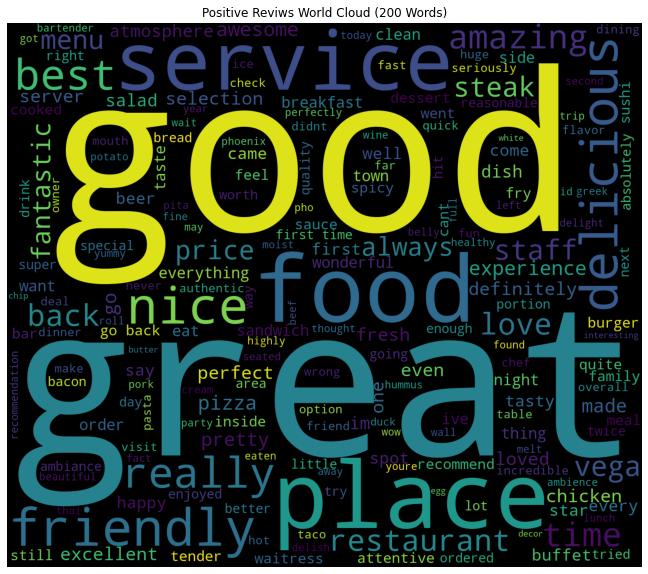

In [99]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
    background_color='black',
    max_words = 200,
    width = 1400,
    height = 1200
).generate(res_pso)

plt.imshow(wordcloud)
plt.title('Positive Reviws World Cloud (200 Words)')
plt.axis('off')
plt.show()

#### Negative Reviews

In [100]:
text_nopunct_neg=''

text_nopunct_neg= "".join([char for char in neg_rev if char not in string.punctuation])

In [101]:
neg_tokens = tokenizer.tokenize(text_nopunct_neg)
len(neg_tokens)

5729

In [102]:
words_neg = []

for word in neg_tokens:
    words_neg.append(word.lower())

In [103]:
final_words_neg=[]

for word in words_neg:
    if word not in stopwords:
        final_words_neg.append(word)

In [104]:
lem_words_neg=[]

for word in final_words_neg:
    word=wn.lemmatize(word)
    lem_words_neg.append(word)

In [105]:
freq_dist_neg = nltk.FreqDist(lem_words_neg)

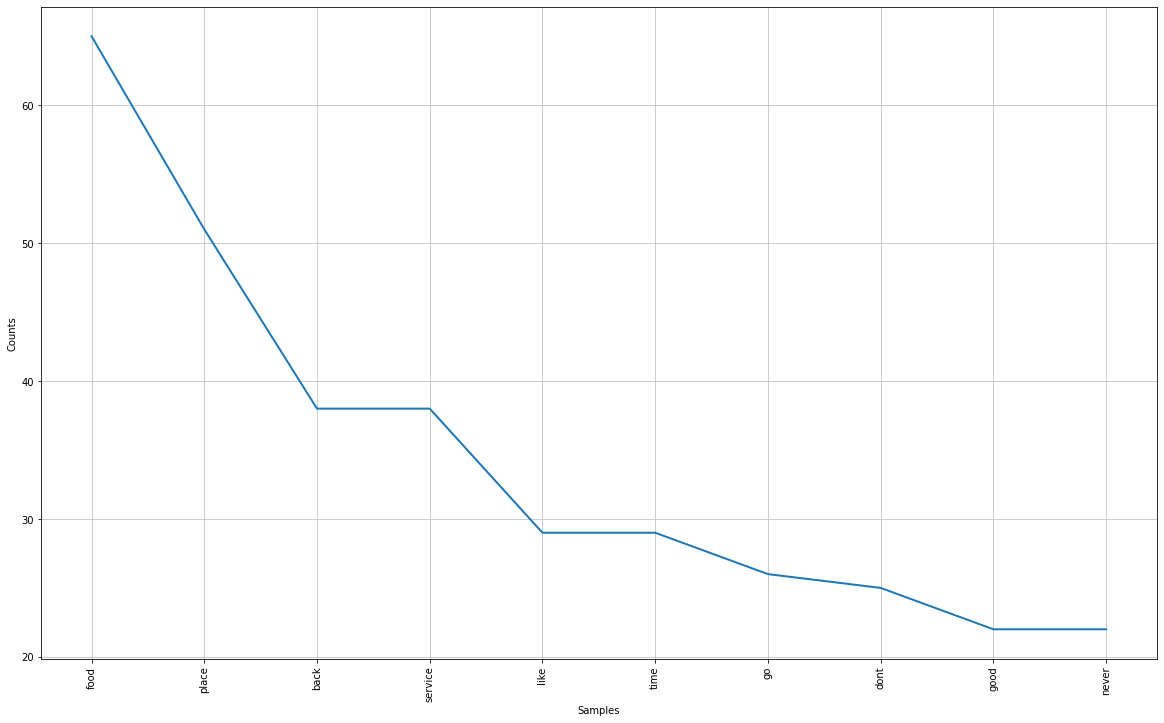

In [106]:
plt.subplots(figsize=(20,12))
freq_dist_neg.plot(10)

In [107]:
res_neg=' '.join([i for i in lem_words_neg if not i.isdigit()])

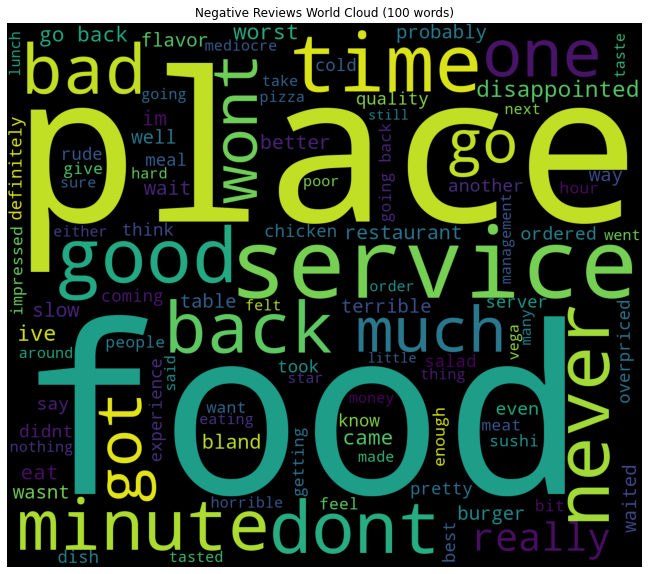

In [108]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (100 words)')
plt.axis('off')
plt.show()

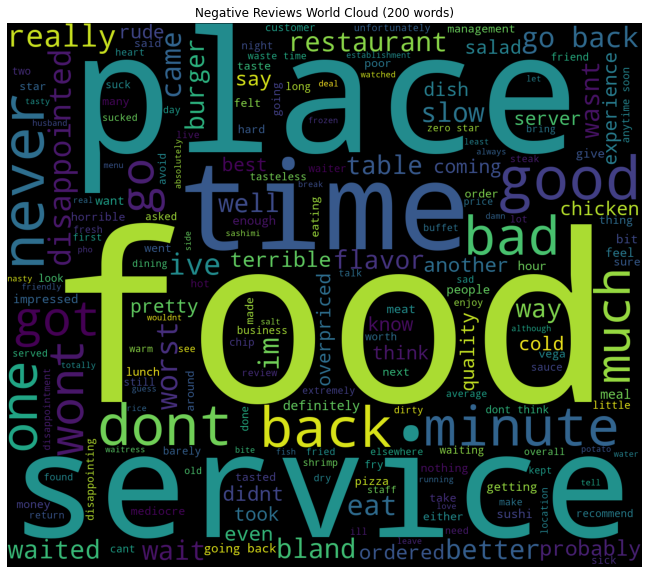

In [109]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res_neg)


plt.imshow(wordcloud)
plt.title('Negative Reviews World Cloud (200 words)')
plt.axis('off')
plt.show()

#### Take aways

1. The chief consumer reviews can be used to understand the pros and cons of the restaurant.
2. The main key words of the positive and negative reviews do give a gist of the customer sentiment.
3. Such analysis with larger amounts of data can help us understand how the restaurant is going to perform